In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='augmented_data.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('augmented_data.zip')
f.keys()
!unzip augmented_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: augmented_data/8/8_156_aug_1.jpg  
  inflating: augmented_data/8/8_156_aug_2.jpg  
  inflating: augmented_data/8/8_156_aug_3.jpg  
  inflating: augmented_data/8/8_156_aug_4.jpg  
  inflating: augmented_data/8/8_157_aug_0.jpg  
  inflating: augmented_data/8/8_157_aug_1.jpg  
  inflating: augmented_data/8/8_157_aug_2.jpg  
  inflating: augmented_data/8/8_157_aug_3.jpg  
  inflating: augmented_data/8/8_157_aug_4.jpg  
  inflating: augmented_data/8/8_158_aug_0.jpg  
  inflating: augmented_data/8/8_158_aug_1.jpg  
  inflating: augmented_data/8/8_158_aug_2.jpg  
  inflating: augmented_data/8/8_158_aug_3.jpg  
  inflating: augmented_data/8/8_158_aug_4.jpg  
  inflating: augmented_data/8/8_159_aug_0.jpg  
  inflating: augmented_data/8/8_159_aug_1.jpg  
  inflating: augmented_data/8/8_159_aug_2.jpg  
  inflating: augmented_data/8/8_159_aug_3.jpg  
  inflating: augmented_data/8/8_159_aug_4.jpg  
  inflating: augmented_data/8/8_15_au

In [2]:
gpus = tf.config.list_logical_devices('GPU')
stg=tf.distribute.MirroredStrategy(gpus)

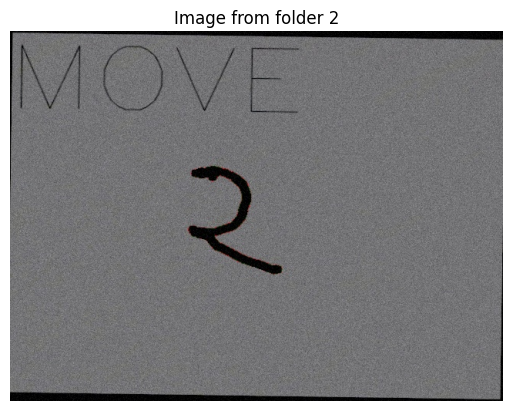

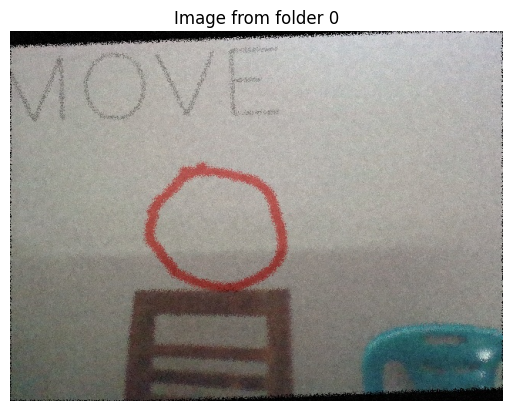

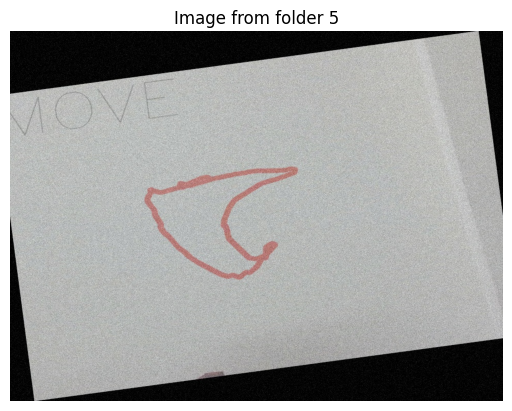

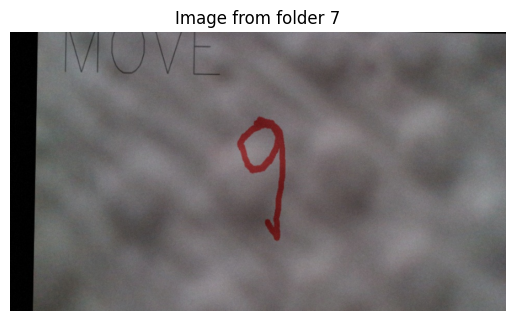

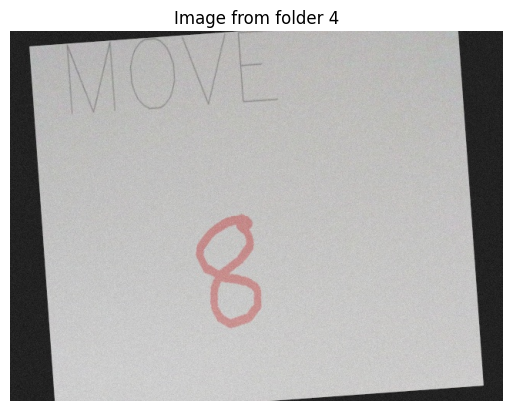

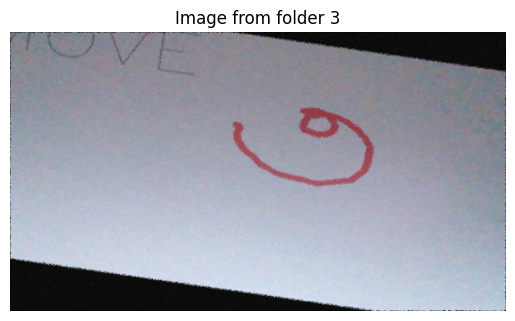

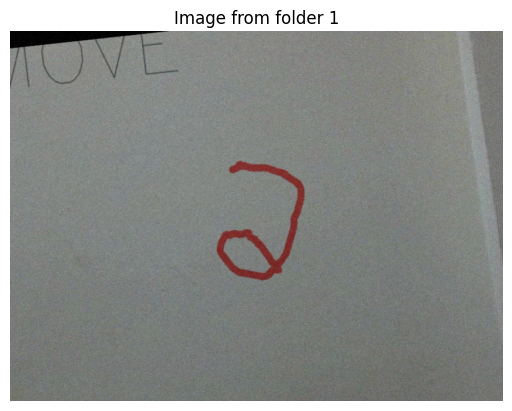

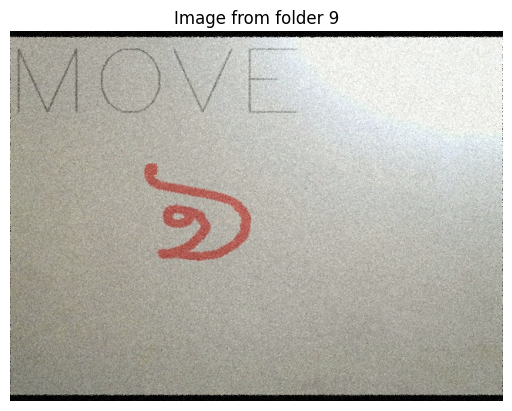

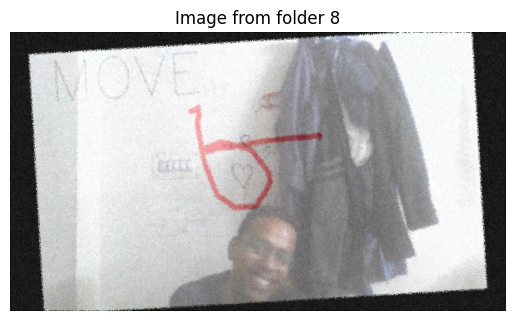

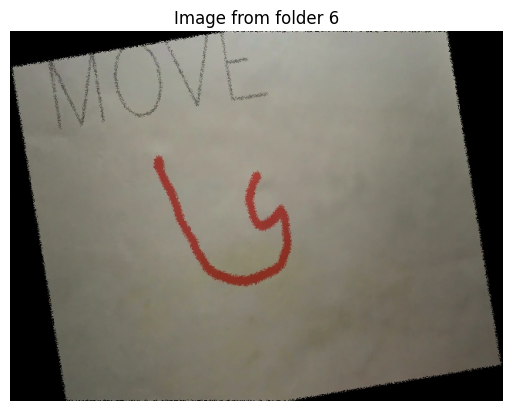

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_dir = '/content/augmented_data'

# Get the list of folders in the directory
folders = os.listdir(folder_dir)

# Iterate through each folder
for folder in folders:
    # Get the list of images in the current folder
    images = os.listdir(os.path.join(folder_dir, folder))

    # Select the first image from the folder
    if images:
        image_path = os.path.join(folder_dir, folder, images[0])

        # Open the image using PIL
        img = Image.open(image_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.title(f'Image from folder {folder}')
        plt.axis('off')  # Hide axis
        plt.show()


In [4]:
import cv2
import os
from tqdm import tqdm

folder_dir_tr = '/content/augmented_data'


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [6]:
import tensorflow as tf

# Define the directory and batch size
folder_dir_tr = '/content/augmented_data'  # Assuming this is your directory
batch_size = 32  # Example batch size
SIZE = (500,300)
# Define the dataset
train_set = tf.keras.utils.image_dataset_from_directory(
    directory=folder_dir_tr,
    shuffle=True,
    image_size=SIZE,  # Resize images to 244x244
    batch_size=batch_size,
    label_mode='categorical',
    seed=22,
    validation_split=0.2,  # 20% of the data will be used for validation
    subset='training',  # Specify that this is the training set
    interpolation='bilinear'  # Interpolation method for resizing
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    directory=folder_dir_tr,
    shuffle=True,
    image_size=SIZE,  # Resize images to 244x244
    batch_size=batch_size,
    label_mode='categorical',
    seed=22,
    validation_split=0.2,  # 20% of the data will be used for validation
    subset='validation',  # Specify that this is the validation set
    interpolation='bilinear'  # Interpolation method for resizing
)

# Optionally, you can print the class names and dataset sizes
class_names = train_set.class_names
print("Class names:", class_names)
print("Number of batches in training set:", len(train_set))
print("Number of batches in validation set:", len(validation_set))


Found 26570 files belonging to 10 classes.
Using 21256 files for training.
Found 26570 files belonging to 10 classes.
Using 5314 files for validation.
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Number of batches in training set: 665
Number of batches in validation set: 167


Found 26570 files belonging to 10 classes.


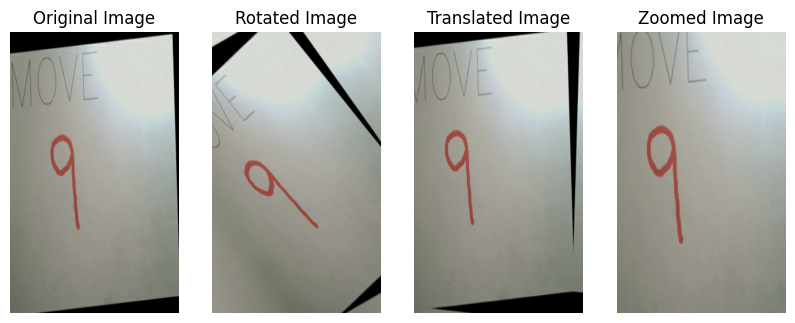

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've defined your image augmentation
rotation_augmentation = Sequential([preprocessing.RandomRotation(factor=0.2)], name="rotation_augmentation")
translation_augmentation = Sequential([preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1)], name="translation_augmentation")
zoom_augmentation = Sequential([preprocessing.RandomZoom(height_factor=0.2)], name="zoom_augmentation")

# Load some sample images from your dataset
# Update the directory accordingly
folder_dir = '/content/augmented_data'
sample_dataset = image_dataset_from_directory(
    directory=folder_dir,
    shuffle=True,
    image_size=SIZE,
    batch_size=1,
    label_mode='categorical',
    seed=22
)

# Apply each augmentation and display the results
for images, labels in sample_dataset.take(1):
    original_image = images[0].numpy()

    # Display the original image
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 4, 1)
    plt.imshow(original_image.astype("uint8"))
    plt.title("Original Image")
    plt.axis("off")

    # Display the rotated image
    rotated_image = rotation_augmentation(images)[0].numpy()
    plt.subplot(1, 4, 2)
    plt.imshow(rotated_image.astype("uint8"))
    plt.title("Rotated Image")
    plt.axis("off")

    # Display the translated image
    translated_image = translation_augmentation(images)[0].numpy()
    plt.subplot(1, 4, 3)
    plt.imshow(translated_image.astype("uint8"))
    plt.title("Translated Image")
    plt.axis("off")

    # Display the zoomed image
    zoomed_image = zoom_augmentation(images)[0].numpy()
    plt.subplot(1, 4, 4)
    plt.imshow(zoomed_image.astype("uint8"))
    plt.title("Zoomed Image")
    plt.axis("off")

    plt.show()


In [8]:
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomTranslation, RandomFlip, RandomZoom
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception, DenseNet121, MobileNetV2, InceptionV3

no_of_classes = 10
SIZE = SIZE
with stg.scope():
    img_augmentation = Sequential(
    [
        RandomRotation(factor=0.01),
        RandomTranslation(height_factor=0.1, width_factor=0.1),
        RandomZoom(height_factor=0.2)
    ],
    name="img_augmentation"
    )

    base_model = MobileNetV2(weights="imagenet", input_shape=(500,300, 3), include_top=False)
    inputs = Input(shape=(500, 300, 3))
    x = img_augmentation(inputs)
    outputs = base_model(x)

    x = GlobalAveragePooling2D()(outputs)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.6)(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(no_of_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=predictions)

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=0.0001),
        metrics=['accuracy'])

model.summary()

9406464/9406464 [==============================] - 1s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500, 300, 3)]     0         
                                                                 
 img_augmentation (Sequenti  (None, 500, 300, 3)       0         
 al)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 16, 10, 1280)      2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                             

In [9]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.1,
                                 patience=1,
                                 verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',
                                patience=10,
                                verbose=1)

callbacks = [lr_scheduler, early_stopping]


In [10]:
import tensorflow as tf

model.trainable = False

history = model.fit(train_set, epochs=3
                    , validation_data=validation_set, callbacks=callbacks,
                    steps_per_epoch=len(train_set), validation_steps=len(validation_set))


Epoch 1/3
665/665 [==============================] - 450s 597ms/step - loss: 0.2899 - accuracy: 0.9077 - val_loss: 31.9790 - val_accuracy: 0.1300 - lr: 0.0010
Epoch 2/3
665/665 [==============================] - 429s 644ms/step - loss: 0.0653 - accuracy: 0.9844 - val_loss: 7.1687 - val_accuracy: 0.3856 - lr: 0.0010
Epoch 3/3
665/665 [==============================] - 386s 578ms/step - loss: 0.0577 - accuracy: 0.9862 - val_loss: 6.3043 - val_accuracy: 0.3997 - lr: 0.0010


In [11]:
test_loss, test_acc = model.evaluate_generator(validation_set)
print('Val accuracy:', test_acc)


<ipython-input-11-cf161702a674>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(validation_set)


Val accuracy: 0.3996989130973816


Found 26570 files belonging to 10 classes.
831/831 [==============================] - 202s 242ms/step
Confusion Matrix:
[[ 380 1529  282  352    5    0    6    1   21   54]
 [   5 1412  858  168    1    0    5    0   10  211]
 [   2   25 2385  151    0    0    8    0    5   89]
 [   0  276  490 1826    0    0   10    0   15   38]
 [  65  793  867  250  228    0    0    2  307  148]
 [  35  272 1478  600    1    0   71    0  120   83]
 [   0   76  816  921    0    0  593    0  169   85]
 [ 209  506 1001  425    5    0    4  313   13  189]
 [   1    7  745  152    0    0    7    0 1711   32]
 [   0  199  623  252    0    0   20    0   52 1504]]


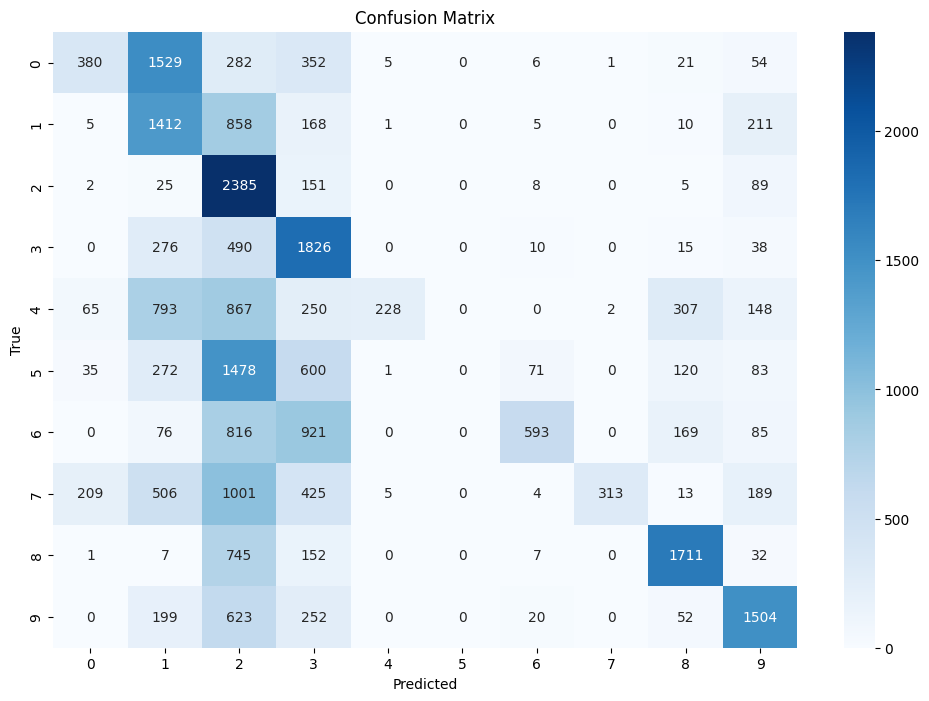

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.14      0.23      2630
           1       0.28      0.53      0.36      2670
           2       0.25      0.89      0.39      2665
           3       0.36      0.69      0.47      2655
           4       0.95      0.09      0.16      2660
           5       0.00      0.00      0.00      2660
           6       0.82      0.22      0.35      2660
           7       0.99      0.12      0.21      2665
           8       0.71      0.64      0.67      2655
           9       0.62      0.57      0.59      2650

    accuracy                           0.39     26570
   macro avg       0.55      0.39      0.34     26570
weighted avg       0.55      0.39      0.34     26570



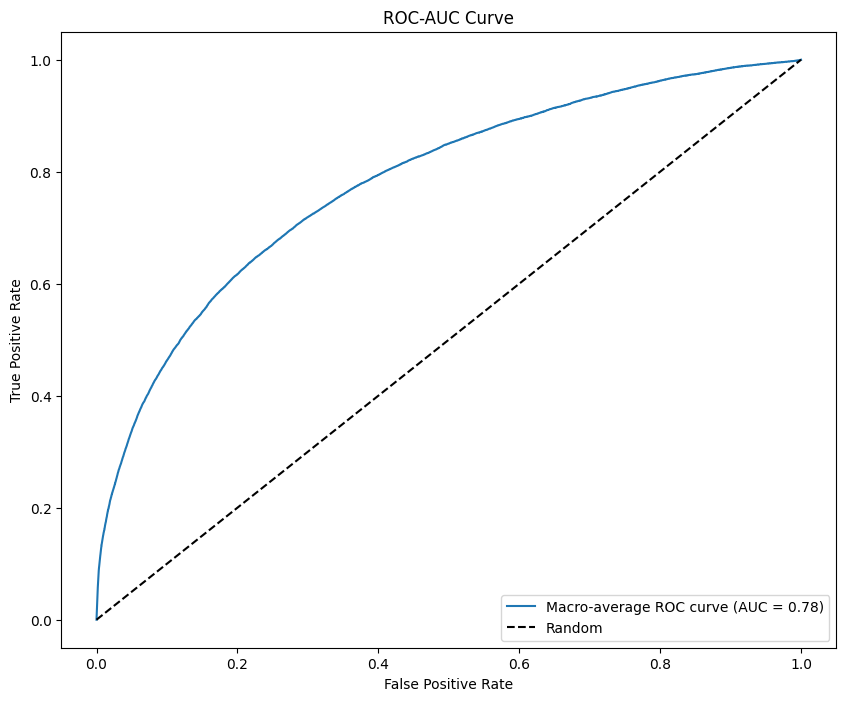

F1 Score: 0.3437
Recall: 0.3896
Precision: 0.5513


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve, auc, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

# Assuming you have your test_set defined
# Replace it with your actual test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    directory=folder_dir_tr,
    shuffle=False,
    image_size=SIZE,
    batch_size=batch_size,
    label_mode='categorical'
)

# Evaluate the model on the test set
y_true = np.concatenate([y for x, y in test_set], axis=0)
y_pred_prob = model.predict(test_set)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(y_true, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)
import seaborn as sns

class_names = [str(i) for i in range(10)]
# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
class_report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Macro-average ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# F1 Score, Recall, Precision
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')

print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
